In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
from scipy import stats
from scipy.stats import linregress

In [65]:
athlete_bio_path = Path("data/Olympic_Athlete_Bio.csv")
athlete_event_results_path = Path("data/Olympic_Athlete_Event_Results.csv")
medal_tally_path = Path("data/Olympic_Games_Medal_Tally.csv")
olympic_results_path = Path("data/Olympic_Results.csv")
olympic_country_path = Path("data/Olympics_Country.csv")
olympic_games_path = Path("data/Olympics_Games.csv")

In [66]:
athlete_bio = pd.read_csv(athlete_bio_path)
athlete_event_results = pd.read_csv(athlete_event_results_path)
medal_tally = pd.read_csv(medal_tally_path)
olympic_results = pd.read_csv(olympic_results_path)
olympic_country = pd.read_csv(olympic_country_path)
olympic_games = pd.read_csv(olympic_games_path)

In [67]:
gender_data_df = pd.merge(athlete_bio, athlete_event_results, how= 'left', on="athlete_id" )

gender_data_df[['year', 'season', 'olympics']] = gender_data_df['edition'].str.split(' ', expand=True, n=2)
gender_data_df

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,...,sport,event,result_id,athlete,pos,medal,isTeamSport,year,season,olympics
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,...,Athletics,"4 × 400 metres Relay, Women",62051,Ivanka Bonova,5 h2 r1/2,NaN,True,1976,Summer,Olympics
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,...,Athletics,"4 × 400 metres Relay, Women",62530,Ivanka Bonova,AC r2/2,NaN,True,1980,Summer,Olympics
2,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,...,Beach Volleyball,"Beach Volleyball, Women",258676,Nataliya Uryadova,=19,NaN,True,2008,Summer,Olympics
3,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,...,Athletics,"10,000 metres, Men",257228,Essa Ismail Rashed,20,NaN,False,2008,Summer,Olympics
4,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN,...,Artistic Gymnastics,"Individual All-Around, Men",70092,Péter Boros,19,NaN,False,1932,Summer,Olympics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316822,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,...,Athletics,"4 × 400 metres Relay, Men",64103,Sunday Bada,5,NaN,True,1992,Summer,Olympics
316823,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,...,Athletics,"400 metres, Men",64676,Sunday Bada,5 h2 r3/4,NaN,False,1996,Summer,Olympics
316824,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,...,Athletics,"4 × 400 metres Relay, Men",64790,Sunday Bada,AC h2 r2/3,NaN,True,1996,Summer,Olympics
316825,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,...,Athletics,"400 metres, Men",65353,Sunday Bada,7 h4 r2/4,NaN,False,2000,Summer,Olympics


In [68]:
Exclude_year = ['1906']
error_year_df = gender_data_df[~gender_data_df['year'].str.contains('|'.join(Exclude_year), case=False)]
error_year_df

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,...,sport,event,result_id,athlete,pos,medal,isTeamSport,year,season,olympics
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,...,Athletics,"4 × 400 metres Relay, Women",62051,Ivanka Bonova,5 h2 r1/2,NaN,True,1976,Summer,Olympics
1,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,...,Athletics,"4 × 400 metres Relay, Women",62530,Ivanka Bonova,AC r2/2,NaN,True,1980,Summer,Olympics
2,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,...,Beach Volleyball,"Beach Volleyball, Women",258676,Nataliya Uryadova,=19,NaN,True,2008,Summer,Olympics
3,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,...,Athletics,"10,000 metres, Men",257228,Essa Ismail Rashed,20,NaN,False,2008,Summer,Olympics
4,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN,...,Artistic Gymnastics,"Individual All-Around, Men",70092,Péter Boros,19,NaN,False,1932,Summer,Olympics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316822,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,...,Athletics,"4 × 400 metres Relay, Men",64103,Sunday Bada,5,NaN,True,1992,Summer,Olympics
316823,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,...,Athletics,"400 metres, Men",64676,Sunday Bada,5 h2 r3/4,NaN,False,1996,Summer,Olympics
316824,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,...,Athletics,"4 × 400 metres Relay, Men",64790,Sunday Bada,AC h2 r2/3,NaN,True,1996,Summer,Olympics
316825,74003,Sunday Bada,Male,22 June 1969,188.0,79,Nigeria,NGR,Sunday Bada was a top Nigerian one-lap runner ...,Listed in Olympians Who Won a Medal at the Wor...,...,Athletics,"400 metres, Men",65353,Sunday Bada,7 h4 r2/4,NaN,False,2000,Summer,Olympics


In [69]:


Exclude_strings = ['Winter', 'Intercalated', 'Equestrian']
summer_only_df = error_year_df[~error_year_df['season'].str.contains('|'.join(Exclude_strings), case=False)]


In [70]:
first_olympic_df = summer_only_df.loc[(summer_only_df["year"] == "1896")]
first_olympic_df

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,...,sport,event,result_id,athlete,pos,medal,isTeamSport,year,season,olympics
76,42673,Ioannis Theofilakis,Male,1879,NaN,NaN,Greece,GRE,Ioannis Theofilakis served in the Army in Worl...,Brother of Alexandros Theofilakis,...,Shooting,"Free Rifle, Any Position, 300 metres, Men",51504,Ioannis Theofilakis,AC,NaN,False,1896,Summer,Olympics
77,42673,Ioannis Theofilakis,Male,1879,NaN,NaN,Greece,GRE,Ioannis Theofilakis served in the Army in Worl...,Brother of Alexandros Theofilakis,...,Shooting,"Military Rifle, 200 metres, Men",51503,Ioannis Theofilakis,9,NaN,False,1896,Summer,Olympics
8171,70737,Dimitrios Golemis,Male,15 November 1874,NaN,NaN,Greece,GRE,Dimitrios Golemis had a remarkable life that s...,NaN,...,Athletics,"800 metres, Men",56011,Dimitrios Golemis,3,Bronze,False,1896,Summer,Olympics
8172,70737,Dimitrios Golemis,Male,15 November 1874,NaN,NaN,Greece,GRE,Dimitrios Golemis had a remarkable life that s...,NaN,...,Athletics,"1,500 metres, Men",56016,Dimitrios Golemis,AC,NaN,False,1896,Summer,Olympics
9982,15379,Nikos Loverdos,Male,NaN,NaN,NaN,Greece,GRE,May have represented Smyrna.,NaN,...,Cycling Track,"12-Hours Race, Men",153004,Nikos Loverdos,DNF,NaN,False,1896,Summer,Olympics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310304,922171,Panagiotis Nastos,Male,NaN,NaN,NaN,Greece,GRE,NaN,NaN,...,Swimming,"1,200 metres Freestyle, Men",4402,Panagiotis Nastos,DNS,NaN,False,1896,Summer,Olympics
311293,2303303,Gustave de Lafreté,Male,4 March 1866,NaN,NaN,France,FRA,NaN,NaN,...,Cycling Road,"Road Race, Individual, Men",153005,Gustave de Lafreté,DNS,NaN,False,1896,Summer,Olympics
313089,70870,Charilaos Vasilakos,Male,November 1875,NaN,NaN,Greece,GRE,"A true pioneer in distance running, Charilaos ...",NaN,...,Athletics,"Marathon, Men",56017,Charilaos Vasilakos,2,Silver,False,1896,Summer,Olympics
315381,178,Demetrius Casdagli,Male,10 October 1872,NaN,NaN,Greece,GRE,Demetrius Casdagli was the older brother of th...,Brother of Xenophon Casdagli,...,Tennis,"Singles, Men",44000,Demetrius Casdagli,2,Silver,False,1896,Summer,Olympics


In [71]:
first_olympics_females = first_olympic_df.loc[(first_olympic_df["sex"] == "Female")]
first_olympics_females

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,...,sport,event,result_id,athlete,pos,medal,isTeamSport,year,season,olympics
11437,1202145,Stamata Revithi,Female,1866,NaN,NaN,Greece,GRE,Stamata Revithi had come to Athens in 1896 to ...,NaN,...,Athletics,"Marathon, Men",56017,Stamata Revithi,DNS,NaN,False,1896,Summer,Olympics
302961,1202146,Melpomene,Female,NaN,NaN,NaN,Greece,GRE,Melpomene is the (given?) name of a female run...,NaN,...,Athletics,"Marathon, Men",56017,Melpomene,DNS,NaN,False,1896,Summer,Olympics


In [72]:
second_olympic_df = summer_only_df.loc[(summer_only_df["year"] == "1948")]
second_olympic_df

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,...,sport,event,result_id,athlete,pos,medal,isTeamSport,year,season,olympics
64,63052,Jimmy Mooney,Male,25 February 1920,182.0,71,Ireland,IRL,Deceased.,NaN,...,Sailing,"One Person Dinghy, Open",9473,Jimmy Mooney,16,NaN,False,1948,Summer,Olympics
211,42368,Bob Maslen-Jones,Male,3 May 1921,NaN,NaN,Great Britain,GBR,"Bob Maslen-Jones trained as a medical student,...",NaN,...,Shooting,"Free Rifle, Three Positions, 300 metres, Men",51641,Bob Maslen-Jones,25,NaN,False,1948,Summer,Olympics
274,42928,Luigi Adami,Male,12 December 1900,NaN,NaN,Italy,ITA,NaN,NaN,...,Shooting,"Small-Bore Rifle, Prone, 50 metres, Men",51640,Luigi Adami,59,NaN,False,1948,Summer,Olympics
327,53758,Carlos Falp,Male,31 December 1913,NaN,NaN,Spain,ESP,NaN,NaN,...,Water Polo,"Water Polo, Men",38179,Carlos Falp,8,NaN,True,1948,Summer,Olympics
513,46862,Alex Jany,Male,5 January 1929,187.0,107,France,FRA,NaN,Brother of Ginette Jany-Sendral Listed in Olym...,...,Swimming,"100 metres Freestyle, Men",5133,Alex Jany,5,NaN,False,1948,Summer,Olympics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316683,30427,Lajos Tóth,Male,25 August 1914,NaN,NaN,Hungary,HUN,Lajos Tóth was a gymnast with Debreceni Torna ...,NaN,...,Artistic Gymnastics,"Parallel Bars, Men",70145,Lajos Tóth,=14,NaN,False,1948,Summer,Olympics
316684,30427,Lajos Tóth,Male,25 August 1914,NaN,NaN,Hungary,HUN,Lajos Tóth was a gymnast with Debreceni Torna ...,NaN,...,Artistic Gymnastics,"Horizontal Bar, Men",70146,Lajos Tóth,=9,NaN,False,1948,Summer,Olympics
316685,30427,Lajos Tóth,Male,25 August 1914,NaN,NaN,Hungary,HUN,Lajos Tóth was a gymnast with Debreceni Torna ...,NaN,...,Artistic Gymnastics,"Rings, Men",70147,Lajos Tóth,=17,NaN,False,1948,Summer,Olympics
316686,30427,Lajos Tóth,Male,25 August 1914,NaN,NaN,Hungary,HUN,Lajos Tóth was a gymnast with Debreceni Torna ...,NaN,...,Artistic Gymnastics,"Pommelled Horse, Men",70148,Lajos Tóth,=30,NaN,False,1948,Summer,Olympics


In [73]:
second_olympic_females = second_olympic_df.loc[(second_olympic_df["sex"] == "Female")]
second_olympic_females

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,...,sport,event,result_id,athlete,pos,medal,isTeamSport,year,season,olympics
1634,28685,Renata Bianchi,Female,12 July 1926,NaN,NaN,Italy,ITA,NaN,NaN,...,Artistic Gymnastics,"Team All-Around, Women",70149,Renata Bianchi,8,NaN,True,1948,Summer,Olympics
2007,920482,Freda Hands,Female,4 March 1918,NaN,NaN,Great Britain,GBR,"Whilst Freda Hands was a painter, it was as a ...",NaN,...,Art Competitions,"Painting, Applied Arts, Open",920070,Freda Hands,AC,NaN,False,1948,Summer,Olympics
2821,47124,Lillian Preece,Female,1 April 1928,NaN,NaN,Great Britain,GBR,Lillian Preece had the following podium finish...,Mother of David Parrington Listed in Olympians...,...,Swimming,"100 metres Freestyle, Women",5197,Lillian Preece,6 h2 r2/3,NaN,False,1948,Summer,Olympics
2822,47124,Lillian Preece,Female,1 April 1928,NaN,NaN,Great Britain,GBR,Lillian Preece had the following podium finish...,Mother of David Parrington Listed in Olympians...,...,Swimming,"4 × 100 metres Freestyle Relay, Women",5236,Lillian Preece,4,NaN,True,1948,Summer,Olympics
5748,28859,Truida Heil-Bonnet,Female,11 July 1920,NaN,NaN,Netherlands,NED,NaN,NaN,...,Artistic Gymnastics,"Team All-Around, Women",70149,Truida Heil-Bonnet,5,NaN,True,1948,Summer,Olympics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316139,920513,Mary Morton,Female,21 March 1879,NaN,NaN,Great Britain,GBR,Mary Morton was a British sculptor and water c...,NaN,...,Art Competitions,"Sculpturing, Unknown Event, Open",920076,Mary Morton,AC,NaN,False,1948,Summer,Olympics
316409,68605,Doris Batter,Female,22 April 1929,NaN,NaN,Great Britain,GBR,Doris Batter took up running to help improve h...,Listed in Olympians Who Won a Medal at the Bri...,...,Athletics,"100 metres, Women",58767,Doris Batter,4 h1 r2/3,NaN,False,1948,Summer,Olympics
316410,68605,Doris Batter,Female,22 April 1929,NaN,NaN,Great Britain,GBR,Doris Batter took up running to help improve h...,Listed in Olympians Who Won a Medal at the Bri...,...,Athletics,"4 × 100 metres Relay, Women",58806,Doris Batter,4,NaN,True,1948,Summer,Olympics
316627,51067,Barbara Jensen,Female,15 September 1929,NaN,NaN,United States,USA,Barbara Jensen learned to swim at the Jewish C...,NaN,...,Swimming,"100 metres Backstroke, Women",5217,Barbara Jensen,5 h2 r2/3,NaN,False,1948,Summer,Olympics


In [74]:
third_olympic_df = summer_only_df.loc[(summer_only_df["year"] == "1984")]
third_olympic_df

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,...,sport,event,result_id,athlete,pos,medal,isTeamSport,year,season,olympics
214,53599,René Bol,Male,5 July 1956,190.0,99,Canada,CAN,René Bol was a member of the bronze medal winn...,Listed in Olympians Who Won a Medal at the Sum...,...,Water Polo,"Water Polo, Men",38678,René Bol,10,NaN,True,1984,Summer,Olympics
249,50132,Nadia Krüger,Female,30 June 1968,171.0,69,Switzerland,SUI,NaN,NaN,...,Swimming,"400 metres Freestyle, Women",7150,Nadia Krüger,18,NaN,False,1984,Summer,Olympics
250,50132,Nadia Krüger,Female,30 June 1968,171.0,69,Switzerland,SUI,NaN,NaN,...,Swimming,"800 metres Freestyle, Women",7158,Nadia Krüger,16,NaN,False,1984,Summer,Olympics
268,75623,Felix Sandy,Male,16 December 1964,178.0,70,Sierra Leone,SLE,Personal Bests: 100 – 10.73 (1989); 400 – 46.0...,NaN,...,Athletics,"4 × 100 metres Relay, Men",62772,Felix Sandy,6 h2 r1/3,NaN,True,1984,Summer,Olympics
269,75623,Felix Sandy,Male,16 December 1964,178.0,70,Sierra Leone,SLE,Personal Bests: 100 – 10.73 (1989); 400 – 46.0...,NaN,...,Athletics,"4 × 400 metres Relay, Men",62781,Felix Sandy,DNS,NaN,True,1984,Summer,Olympics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316634,33747,Bjarni Friðriksson,Male,29 May 1956,190.0,95,Iceland,ISL,NaN,NaN,...,Judo,"Half-Heavyweight, Men",16342,Bjarni Friðriksson,=3,Bronze,False,1984,Summer,Olympics
316657,41469,Mark Bedlington,Male,24 April 1963,176.0,70,Canada,CAN,NaN,Listed in Olympians Who Won a Medal at the Sum...,...,Shooting,"Running Target, 50 metres, Men",51767,Mark Bedlington,20,NaN,False,1984,Summer,Olympics
316728,22302,Jürgen Nolte,Male,19 November 1959,178.0,68,Germany West Germany,GER,"Sabre fencer Jürgen Nolte finished fourth, six...",Listed in Olympians Who Won a Medal at the Wor...,...,Fencing,"Sabre, Individual, Men",106163,Jürgen Nolte,15,NaN,False,1984,Summer,Olympics
316729,22302,Jürgen Nolte,Male,19 November 1959,178.0,68,Germany West Germany,GER,"Sabre fencer Jürgen Nolte finished fourth, six...",Listed in Olympians Who Won a Medal at the Wor...,...,Fencing,"Sabre, Team, Men",107518,Jürgen Nolte,4,NaN,True,1984,Summer,Olympics


In [75]:
third_olympic_females = third_olympic_df.loc[(third_olympic_df["sex"] == "Female")]
third_olympic_females

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,...,sport,event,result_id,athlete,pos,medal,isTeamSport,year,season,olympics
249,50132,Nadia Krüger,Female,30 June 1968,171.0,69,Switzerland,SUI,NaN,NaN,...,Swimming,"400 metres Freestyle, Women",7150,Nadia Krüger,18,NaN,False,1984,Summer,Olympics
250,50132,Nadia Krüger,Female,30 June 1968,171.0,69,Switzerland,SUI,NaN,NaN,...,Swimming,"800 metres Freestyle, Women",7158,Nadia Krüger,16,NaN,False,1984,Summer,Olympics
292,44842,Valentina Atanaskovski,Female,30 June 1963,166.0,64,Yugoslavia,YUG,NaN,NaN,...,Shooting,"Air Rifle, 10 metres, Women",51773,Valentina Atanaskovski,17,NaN,False,1984,Summer,Olympics
646,9224,Alexandra Barré,Female,29 January 1958,173.0,59,Canada,CAN,Hungarian Alexandra Sandor began her athletic ...,Wife of Denis Barré Mother of Mylanie Barré Si...,...,Canoe Sprint,"Kayak Doubles, 500 metres, Women",255775,Alexandra Barré,2,Silver,True,1984,Summer,Olympics
647,9224,Alexandra Barré,Female,29 January 1958,173.0,59,Canada,CAN,Hungarian Alexandra Sandor began her athletic ...,Wife of Denis Barré Mother of Mylanie Barré Si...,...,Canoe Sprint,"Kayak Fours, 500 metres, Women",255782,Alexandra Barré,3,Bronze,True,1984,Summer,Olympics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316048,75043,Angelita Lind,Female,13 January 1959,165.0,51,Puerto Rico,PUR,Angelita Lind finished fifth in the 800 metres...,Listed in Olympians Who Won a Medal at the Cen...,...,Athletics,"800 metres, Women",63076,Angelita Lind,6 h1 r2/3,NaN,False,1984,Summer,Olympics
316049,75043,Angelita Lind,Female,13 January 1959,165.0,51,Puerto Rico,PUR,Angelita Lind finished fifth in the 800 metres...,Listed in Olympians Who Won a Medal at the Cen...,...,Athletics,"4 × 400 metres Relay, Women",63123,Angelita Lind,5 h1 r1/2,NaN,True,1984,Summer,Olympics
316326,75987,Eva Ernström,Female,2 September 1961,170.0,52,Sweden,SWE,Eva Ernström was a distance runner who ran in ...,NaN,...,Athletics,"3,000 metres, Women",63091,Eva Ernström,6 h2 r1/2,NaN,False,1984,Summer,Olympics
316398,13053,Wakako Abe,Female,4 April 1966,168.0,60,Japan,JPN,NaN,Listed in Olympians Who Won a Medal at the Asi...,...,Cycling Road,"Road Race, Individual, Women",154567,Wakako Abe,40,NaN,False,1984,Summer,Olympics


In [76]:
fourth_olympic_df = summer_only_df.loc[(summer_only_df["year"] == "2020")]
fourth_olympic_df

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,...,sport,event,result_id,athlete,pos,medal,isTeamSport,year,season,olympics
12,146111,Svetlana Kholomina,Female,9 November 1997,NaN,NaN,ROC,ROC,NaN,NaN,...,Beach Volleyball,"Beach Volleyball, Women",19001777,Svetlana Kholomina,=9,NaN,True,2020,Summer,Olympics
14,133041,Vincent Riendeau,Male,13 December 1996,178.0,68,Canada,CAN,NaN,Listed in Olympians Who Won a Medal at the Sum...,...,Diving,"Synchronized Platform, Men",19002279,Vincent Riendeau,5,NaN,True,2020,Summer,Olympics
29,146013,Raquel Queirós,Female,4 March 2000,167.0,56,Portugal,POR,NaN,NaN,...,Cycling Mountain Bike,"Cross-Country, Women",19001705,Raquel Queirós,27,NaN,False,2020,Summer,Olympics
62,142869,Julien Mertine,Male,25 June 1988,NaN,NaN,France,FRA,NaN,NaN,...,Fencing,"Foil, Individual, Men",19016400,Julien Mertine,24,NaN,False,2020,Summer,Olympics
63,142869,Julien Mertine,Male,25 June 1988,NaN,NaN,France,FRA,NaN,NaN,...,Fencing,"Foil, Team, Men",19016471,Julien Mertine,1,Gold,True,2020,Summer,Olympics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316794,135055,Andrius Šidlauskas,Male,6 April 1997,187.0,77,Lithuania,LTU,NaN,Listed in Olympians Who Won a Medal at the Eur...,...,Swimming,"100 metres Breaststroke, Men",19000094,Andrius Šidlauskas,14,NaN,False,2020,Summer,Olympics
316795,135055,Andrius Šidlauskas,Male,6 April 1997,187.0,77,Lithuania,LTU,NaN,Listed in Olympians Who Won a Medal at the Eur...,...,Swimming,"200 metres Breaststroke, Men",19000106,Andrius Šidlauskas,16,NaN,False,2020,Summer,Olympics
316796,135055,Andrius Šidlauskas,Male,6 April 1997,187.0,77,Lithuania,LTU,NaN,Listed in Olympians Who Won a Medal at the Eur...,...,Swimming,"4 × 100 metres Medley Relay, Men",19000159,Andrius Šidlauskas,DQ,NaN,True,2020,Summer,Olympics
316797,143941,Raz Hershko,Female,19 June 1998,NaN,NaN,Israel,ISR,NaN,NaN,...,Judo,"Heavyweight, Women",18001466,Raz Hershko,=9,NaN,False,2020,Summer,Olympics


In [77]:
fourth_olympic_females = fourth_olympic_df.loc[(fourth_olympic_df["sex"] == "Female")]
fourth_olympic_females

,athlete_id,name,sex,born,height,weight,country,country_noc_x,description,special_notes,...,sport,event,result_id,athlete,pos,medal,isTeamSport,year,season,olympics
12,146111,Svetlana Kholomina,Female,9 November 1997,NaN,NaN,ROC,ROC,NaN,NaN,...,Beach Volleyball,"Beach Volleyball, Women",19001777,Svetlana Kholomina,=9,NaN,True,2020,Summer,Olympics
29,146013,Raquel Queirós,Female,4 March 2000,167.0,56,Portugal,POR,NaN,NaN,...,Cycling Mountain Bike,"Cross-Country, Women",19001705,Raquel Queirós,27,NaN,False,2020,Summer,Olympics
215,144390,Aki Yamada,Female,24 November 1992,NaN,NaN,Japan,JPN,NaN,NaN,...,Hockey,"Hockey, Women",19001396,Aki Yamada,11,NaN,True,2020,Summer,Olympics
218,2101890,Diananda Choirunisa,Female,16 March 1997,NaN,NaN,Indonesia,INA,NaN,Listed in Olympians Who Won a Medal at the Asi...,...,Archery,"Individual, Women",18000588,Diananda Choirunisa,=33,NaN,False,2020,Summer,Olympics
219,2101890,Diananda Choirunisa,Female,16 March 1997,NaN,NaN,Indonesia,INA,NaN,Listed in Olympians Who Won a Medal at the Asi...,...,Archery,"Team, Mixed",18000470,Diananda Choirunisa,7,NaN,True,2020,Summer,Olympics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316761,147269,Ashley Twichell,Female,16 June 1989,NaN,NaN,United States,USA,NaN,NaN,...,Marathon Swimming,"10 kilometres Open Water, Women",19000337,Ashley Twichell,7,NaN,False,2020,Summer,Olympics
316766,145936,Ewa Trzebińska,Female,1 May 1989,NaN,NaN,Poland,POL,NaN,NaN,...,Fencing,"Épée, Individual, Women",19017223,Ewa Trzebińska,27,NaN,False,2020,Summer,Olympics
316767,145936,Ewa Trzebińska,Female,1 May 1989,NaN,NaN,Poland,POL,NaN,NaN,...,Fencing,"Épée, Team, Women",19017294,Ewa Trzebińska,6,NaN,True,2020,Summer,Olympics
316797,143941,Raz Hershko,Female,19 June 1998,NaN,NaN,Israel,ISR,NaN,NaN,...,Judo,"Heavyweight, Women",18001466,Raz Hershko,=9,NaN,False,2020,Summer,Olympics


The correlation between Summer Olympic Year and Female Athletes is 0.93


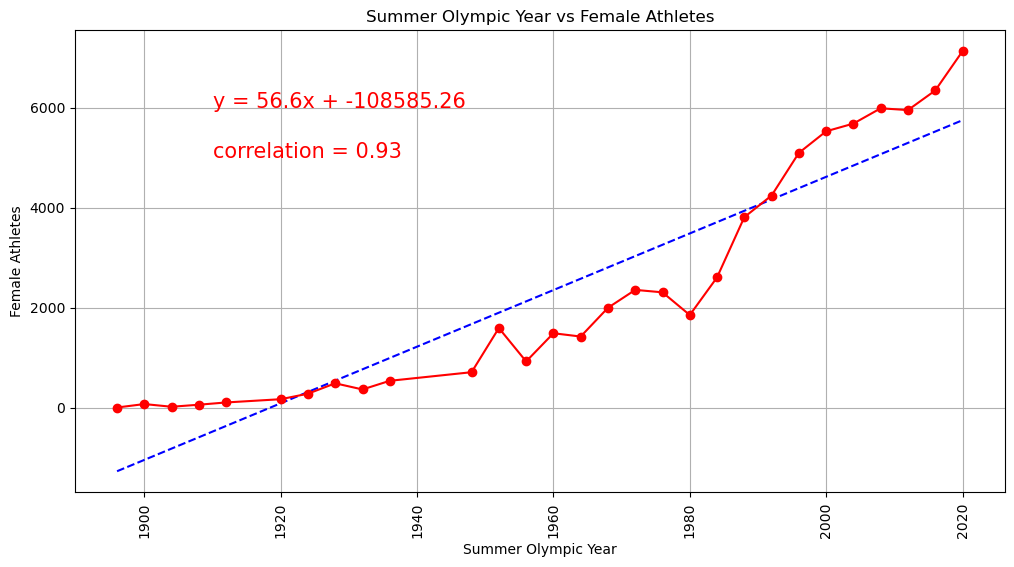

In [78]:

collected_view_df = summer_only_df.loc[(summer_only_df["sex"] == "Female")]
female_participants = collected_view_df["year"].value_counts().sort_index()
x_values = female_participants.index.astype(int)
y_values = female_participants.values
correlation = round(st.pearsonr(x_values, y_values)[0], 2)
plt.figure(figsize=(12, 6))
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_value = x_values * slope + intercept
plt.plot(x_values, regress_value, color='blue', linestyle='--', label='Regression Line')
plt.plot(x_values, y_values, color='red', marker='o')
plt.annotate(line,(1910,6000),fontsize=15,color="red")
plt.annotate(f"correlation = {correlation}",(1910,5000),fontsize=15,color="red")
plt.title("Summer Olympic Year vs Female Athletes")
plt.xlabel("Summer Olympic Year")
plt.ylabel("Female Athletes")
plt.xticks(rotation=90)
plt.grid(True)
print(f"The correlation between Summer Olympic Year and Female Athletes is {correlation}")



In [79]:
total_athletes_df = (summer_only_df["year"].value_counts().sort_index())


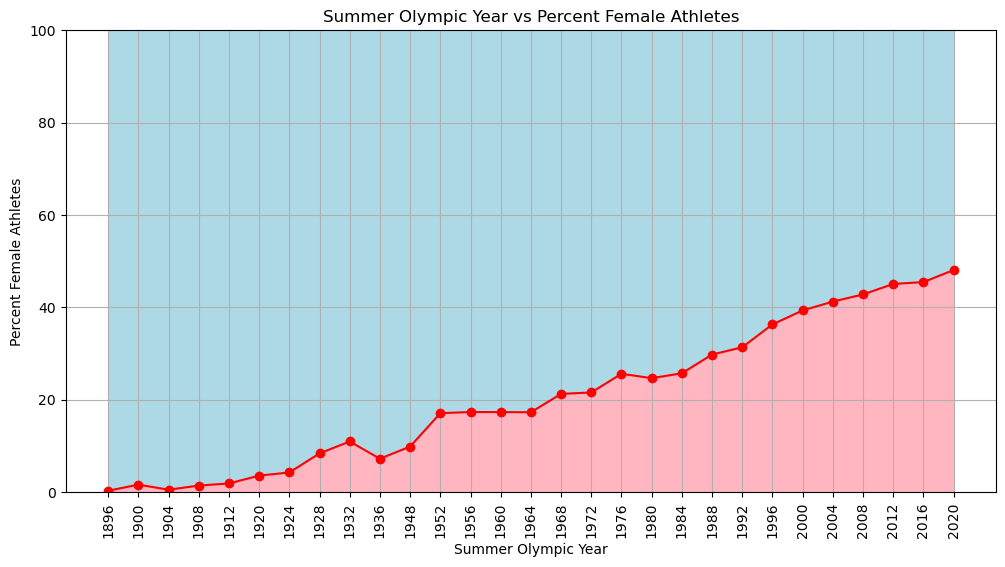

In [83]:

collected_view_df = summer_only_df.loc[(summer_only_df["sex"] == "Female")]
female_percent = ((collected_view_df["year"].value_counts().sort_index())/total_athletes_df)*100
plt.figure(figsize=(12, 6))
plt.plot(female_percent.index, female_percent, color='red', marker = 'o')

plt.title("Summer Olympic Year vs Percent Female Athletes")
plt.xlabel("Summer Olympic Year")
plt.ylabel("Percent Female Athletes")

plt.ylim(0, 100)
plt.fill_between(female_percent.index, female_percent, 100, color='lightblue')
plt.fill_between(female_percent.index, female_percent, 0, color='lightpink')
plt.xticks(rotation=90)
plt.grid(True)